In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
 
lametro = pd.read_csv("../data/final/metro/mi_final_lametro.csv")
chimetro = pd.read_csv("../data/final/metro/mi_final_chimetro.csv")
dcmetro = pd.read_csv("../data/final/metro/mi_final_dcmetro.csv")
dalmetro = pd.read_csv("../data/final/metro/mi_final_txmetro.csv")

lametro_adj = lametro[["Norm Price","City","dist_hospitals","dist_gym","dist_cemetary","dist_parks","dist_beaches","dist_shopping","dist_grocery","dist_resturant","dist_golf","dist_school"]]
chimetro_adj = chimetro[["Norm Price","City","dist_hospitals","dist_gym","dist_cemetary","dist_parks","dist_beaches","dist_shopping","dist_grocery","dist_resturant","dist_golf","dist_school"]]
dcmetro_adj = dcmetro[["Norm Price","City","dist_hospitals","dist_gym","dist_cemetary","dist_parks","dist_beaches","dist_shopping","dist_grocery","dist_resturant","dist_golf","dist_school"]]
dalmetro_adj = dalmetro[["Norm Price","City","dist_hospitals","dist_gym","dist_cemetary","dist_parks","dist_beaches","dist_shopping","dist_grocery","dist_resturant","dist_golf","dist_school"]]

lametro_adj = lametro_adj.rename(columns={lametro_adj.columns[0]: "Norm" })
chimetro_adj = chimetro_adj.rename(columns={chimetro_adj.columns[0]: "Norm" })
dcmetro_adj = dcmetro_adj.rename(columns={dcmetro_adj.columns[0]: "Norm" })
dalmetro_adj = dalmetro_adj.rename(columns={dalmetro_adj.columns[0]: "Norm" })

metro = pd.concat([lametro_adj,chimetro_adj,dcmetro_adj,dalmetro_adj])

lametro_adj

,Norm,City,dist_hospitals,dist_gym,dist_cemetary,dist_parks,dist_beaches,dist_shopping,dist_grocery,dist_resturant,dist_golf,dist_school
0,0.130498,Anaheim,0.610331,0.518619,1.062952,3.385632,4.960863,0.505280,0.550465,0.459207,1.012771,0.313821
1,0.165138,Anaheim,0.308511,0.585863,0.555159,7.148887,2.296997,0.284180,0.284180,0.198474,0.538214,0.116415
2,0.203905,Anaheim,1.040936,0.533816,3.768368,15.558439,8.558395,0.766242,1.029233,0.745108,0.541673,0.417616
3,0.029812,Anaheim,0.292164,0.809374,0.269206,6.483451,4.707094,0.230011,0.894208,0.840625,0.775857,0.455637
4,0.010686,Anaheim,1.401012,0.536424,1.936416,9.827726,2.648951,0.439173,0.447649,0.845462,0.883240,0.743085
...,...,...,...,...,...,...,...,...,...,...,...,...
1453,0.203803,Long Beach,0.500653,0.430653,1.227559,0.949414,2.417794,0.117849,0.117849,0.323568,0.500653,0.267801
1454,0.187842,Long Beach,1.857301,0.950981,1.213758,0.450573,8.205622,0.250280,0.330921,0.664393,0.998981,0.549961
1455,0.212962,Long Beach,0.949469,0.093114,1.646517,0.966751,1.904709,0.126626,0.493645,0.211252,0.949469,0.425651
1456,0.212970,Long Beach,2.073755,0.447723,1.559334,0.101253,8.736314,0.139850,0.120683,0.685629,0.880251,0.431559


In [39]:
metro.to_csv("metro.csv")

Removing outlier ....

In [40]:
nummetro = metro.drop(columns = ["City","Norm"])
nummetro = nummetro.reset_index(drop=True)
citymetro = metro[["City","Norm"]]
citymetro = citymetro.reset_index(drop=True)
nummetro = nummetro[(np.abs(stats.zscore(nummetro)) < 3).all(axis=1)]
nummetro = nummetro.join(citymetro)

In [41]:
nummetro

,dist_hospitals,dist_gym,dist_cemetary,dist_parks,dist_beaches,dist_shopping,dist_grocery,dist_resturant,dist_golf,dist_school,City,Norm
0,0.610331,0.518619,1.062952,3.385632,4.960863,0.505280,0.550465,0.459207,1.012771,0.313821,Anaheim,0.130498
1,0.308511,0.585863,0.555159,7.148887,2.296997,0.284180,0.284180,0.198474,0.538214,0.116415,Anaheim,0.165138
2,1.040936,0.533816,3.768368,15.558439,8.558395,0.766242,1.029233,0.745108,0.541673,0.417616,Anaheim,0.203905
3,0.292164,0.809374,0.269206,6.483451,4.707094,0.230011,0.894208,0.840625,0.775857,0.455637,Anaheim,0.029812
4,1.401012,0.536424,1.936416,9.827726,2.648951,0.439173,0.447649,0.845462,0.883240,0.743085,Anaheim,0.010686
...,...,...,...,...,...,...,...,...,...,...,...,...
3980,1.006793,1.293579,2.197825,2.559176,7.747526,1.173330,3.148462,1.763668,0.252484,1.669767,Fort Worth,0.138469
3981,1.522501,0.667016,1.026508,0.819505,12.474730,0.284814,0.126071,1.061987,0.603412,0.063308,Fort Worth,0.095158
3982,1.185673,5.412988,2.498093,2.377362,3.065472,1.966976,5.100353,2.450081,2.462565,0.900729,Fort Worth,0.068760
3983,2.313966,1.029101,2.596078,2.399600,6.097553,1.973269,6.816230,1.754955,2.160436,0.750054,Fort Worth,0.062417


First Regression Test: (with Outliers)
 - $R^2$ only 56%

In [42]:
# ALL METRO DATA 
import pandas as pd
import numpy as np
import statsmodels.api as sm 
from scipy import stats

resulta = sm.OLS(metro['Norm'], metro.drop(columns=["Norm","City"])).fit() #Initialize the GLS 
print(resulta.summary())

                                 OLS Regression Results                                
Dep. Variable:                   Norm   R-squared (uncentered):                   0.566
Model:                            OLS   Adj. R-squared (uncentered):              0.565
Method:                 Least Squares   F-statistic:                              517.7
Date:                Mon, 05 Dec 2022   Prob (F-statistic):                        0.00
Time:                        21:50:39   Log-Likelihood:                          1980.3
No. Observations:                3985   AIC:                                     -3941.
Df Residuals:                    3975   BIC:                                     -3878.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

Second Test: (without outliers)
 - $R^2$ improved to 60%
 - Diagnostic Testing:
     - Multicollinearity not present
     - Since Residuals vs Predicted Values exhibits a pattern. Error likely correlated, data not normal. 
     - Durbin Watson low (1.3), suggesting likely unequal variance.
     - QQ Plot shows significant departures from straight line pattern, data not normal.

In [43]:
# OUTLIER REMOVED
import pandas as pd
import numpy as np
import statsmodels.api as sm 
from scipy import stats

resulta = sm.OLS(nummetro['Norm'], nummetro.drop(columns=["Norm","City"])).fit() #Initialize the GLS 
print(resulta.summary())

                                 OLS Regression Results                                
Dep. Variable:                   Norm   R-squared (uncentered):                   0.608
Model:                            OLS   Adj. R-squared (uncentered):              0.607
Method:                 Least Squares   F-statistic:                              592.4
Date:                Mon, 05 Dec 2022   Prob (F-statistic):                        0.00
Time:                        21:50:39   Log-Likelihood:                          2059.1
No. Observations:                3829   AIC:                                     -4098.
Df Residuals:                    3819   BIC:                                     -4036.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [44]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('Norm ~ dist_hospitals+dist_gym+dist_cemetary+dist_parks+dist_beaches+dist_shopping+dist_grocery+dist_resturant+dist_golf+dist_school', data=nummetro, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif = vif.set_index("variable")
vif
vif.style.applymap(lambda x: 'background-color : purple' if x>5 else '')

,VIF
variable,
Intercept,8.495865
dist_hospitals,2.219018
dist_gym,2.346338
dist_cemetary,1.503338
dist_parks,1.242641
dist_beaches,1.306978
dist_shopping,2.613967
dist_grocery,2.558275
dist_resturant,3.310305


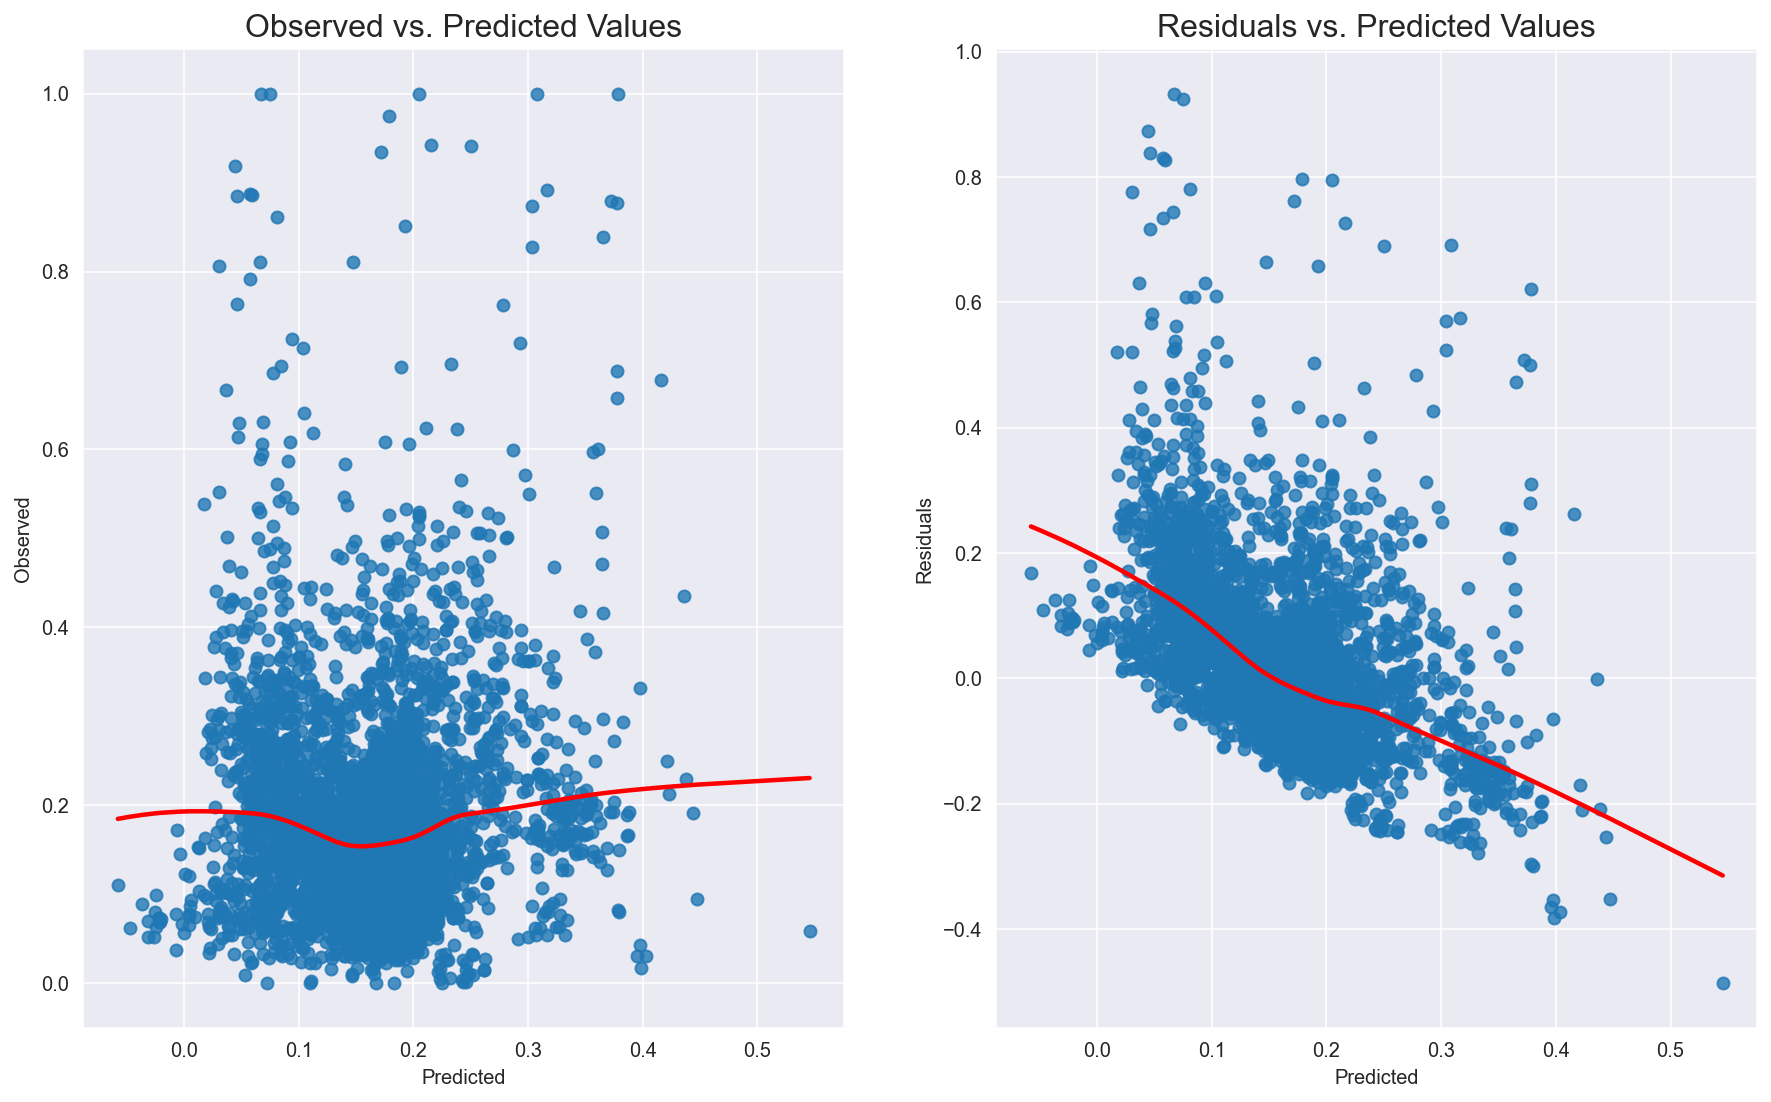

In [45]:

%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(resulta, y=nummetro[["Norm"]])    

In [46]:
import statsmodels.stats.api
statsmodels.stats.stattools.durbin_watson(resulta.resid)

1.3167918808199846

Text(0.5, 1.0, 'Model1 Residuals Q-Q Plot')

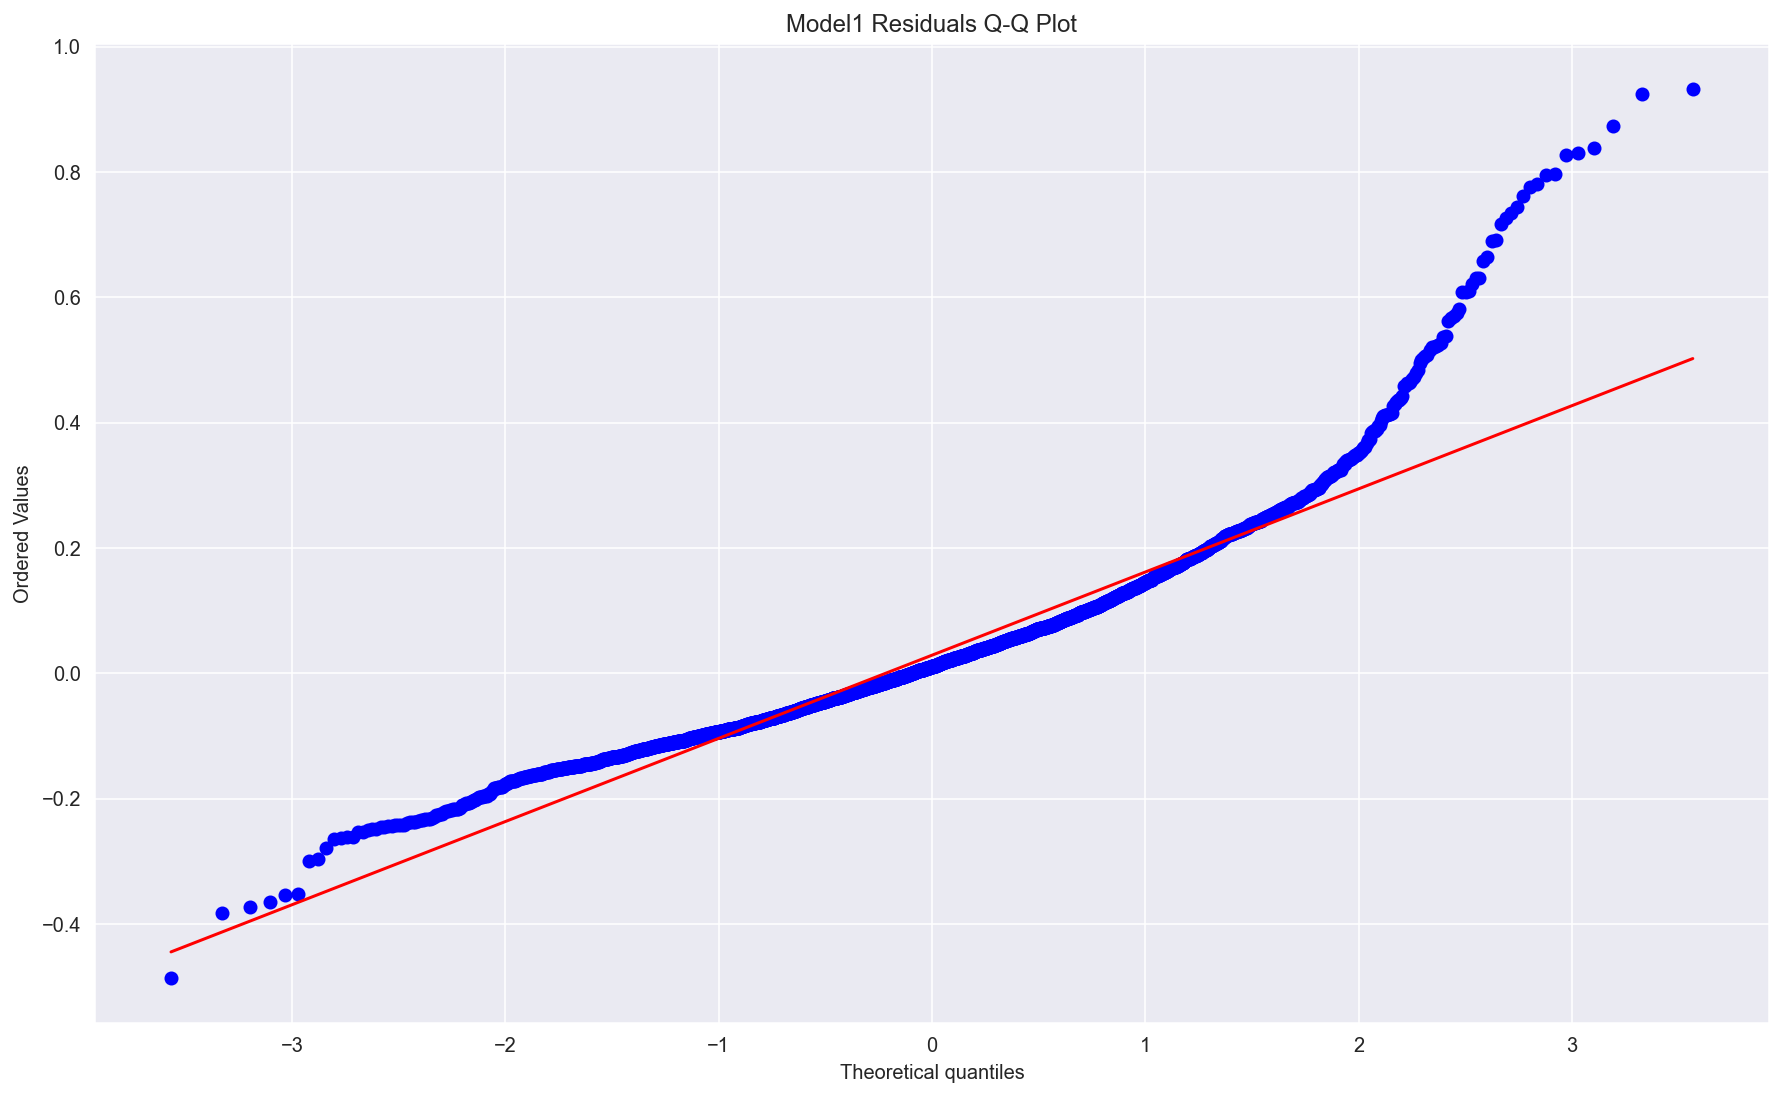

In [47]:
import statsmodels.stats.api
stats.probplot(resulta.resid, dist="norm", plot= plt)
plt.title("Model1 Residuals Q-Q Plot")

Apply $log$ transformation to remedy unequal variance and nonormality

In [48]:
import numpy as np
nummetro = metro.drop(columns = ["City","Norm"])
nummetro = np.log(nummetro)
nummetro = nummetro.reset_index(drop=True)
citymetro = metro[["City","Norm"]]
citymetro = citymetro.reset_index(drop=True)

nummetro = nummetro.join(citymetro)
nummetro.to_csv("test.csv")

c:\Users\timot\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [49]:
nummetro.corr()

,dist_hospitals,dist_gym,dist_cemetary,dist_parks,dist_beaches,dist_shopping,dist_grocery,dist_resturant,dist_golf,dist_school,Norm
dist_hospitals,1.000000,0.515694,0.604866,0.360281,-0.034252,0.474316,0.460623,0.500327,0.413548,0.512748,-0.248497
dist_gym,0.515694,1.000000,0.321175,0.316845,0.199103,0.616614,0.625277,0.703891,0.523477,0.294265,-0.273415
dist_cemetary,0.604866,0.321175,1.000000,0.274067,-0.012427,0.368008,0.332777,0.339390,0.325973,0.395898,-0.192957
dist_parks,0.360281,0.316845,0.274067,1.000000,-0.350899,0.259560,0.302995,0.312379,0.196683,0.256588,-0.035702
dist_beaches,-0.034252,0.199103,-0.012427,-0.350899,1.000000,0.212406,0.165381,0.195804,0.215949,0.031191,-0.290996
dist_shopping,0.474316,0.616614,0.368008,0.259560,0.212406,1.000000,0.724604,0.621519,0.476684,0.422814,-0.204244
dist_grocery,0.460623,0.625277,0.332777,0.302995,0.165381,0.724604,1.000000,0.650338,0.460562,0.400989,-0.214191
dist_resturant,0.500327,0.703891,0.339390,0.312379,0.195804,0.621519,0.650338,1.000000,0.503212,0.344895,-0.292329
dist_golf,0.413548,0.523477,0.325973,0.196683,0.215949,0.476684,0.460562,0.503212,1.000000,0.312193,-0.259484
dist_school,0.512748,0.294265,0.395898,0.256588,0.031191,0.422814,0.400989,0.344895,0.312193,1.000000,-0.123228


Third Regression Test: (log transformation applied)
 - Improved $R^2$ to 65%, pretty good for this study case
 - SHOPPING and GROCERY no longer significant
 - Diagnostics:
     - Durbin Watson improved but not by much (suggesting still unequal variances)
     - Residuals vs Predicted improved a little
     - Nothing changed for QQ Plot

In [50]:
# ALL METRO DATA (Distance Normalized)
import pandas as pd
import numpy as np
import statsmodels.api as sm 
from scipy import stats

nummetro = nummetro[nummetro.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)] 
resulta = sm.OLS(nummetro['Norm'], nummetro.drop(columns=["Norm","City"])).fit() 
print(resulta.summary())

                                 OLS Regression Results                                
Dep. Variable:                   Norm   R-squared (uncentered):                   0.655
Model:                            OLS   Adj. R-squared (uncentered):              0.654
Method:                 Least Squares   F-statistic:                              754.7
Date:                Mon, 05 Dec 2022   Prob (F-statistic):                        0.00
Time:                        21:50:44   Log-Likelihood:                          2438.4
No. Observations:                3983   AIC:                                     -4857.
Df Residuals:                    3973   BIC:                                     -4794.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [51]:
import statsmodels.stats.api
statsmodels.stats.stattools.durbin_watson(resulta.resid)

1.4855826950847542

In [52]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('Norm ~ dist_hospitals+dist_gym+dist_cemetary+dist_parks+dist_beaches+dist_shopping+dist_grocery+dist_resturant+dist_golf+dist_school', data=nummetro, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif = vif.set_index("variable")
vif
vif.style.applymap(lambda x: 'background-color : purple' if x>5 else '')

,VIF
variable,
Intercept,13.349024
dist_hospitals,2.273155
dist_gym,2.543072
dist_cemetary,1.635199
dist_parks,1.506173
dist_beaches,1.404092
dist_shopping,2.543447
dist_grocery,2.570942
dist_resturant,2.498189


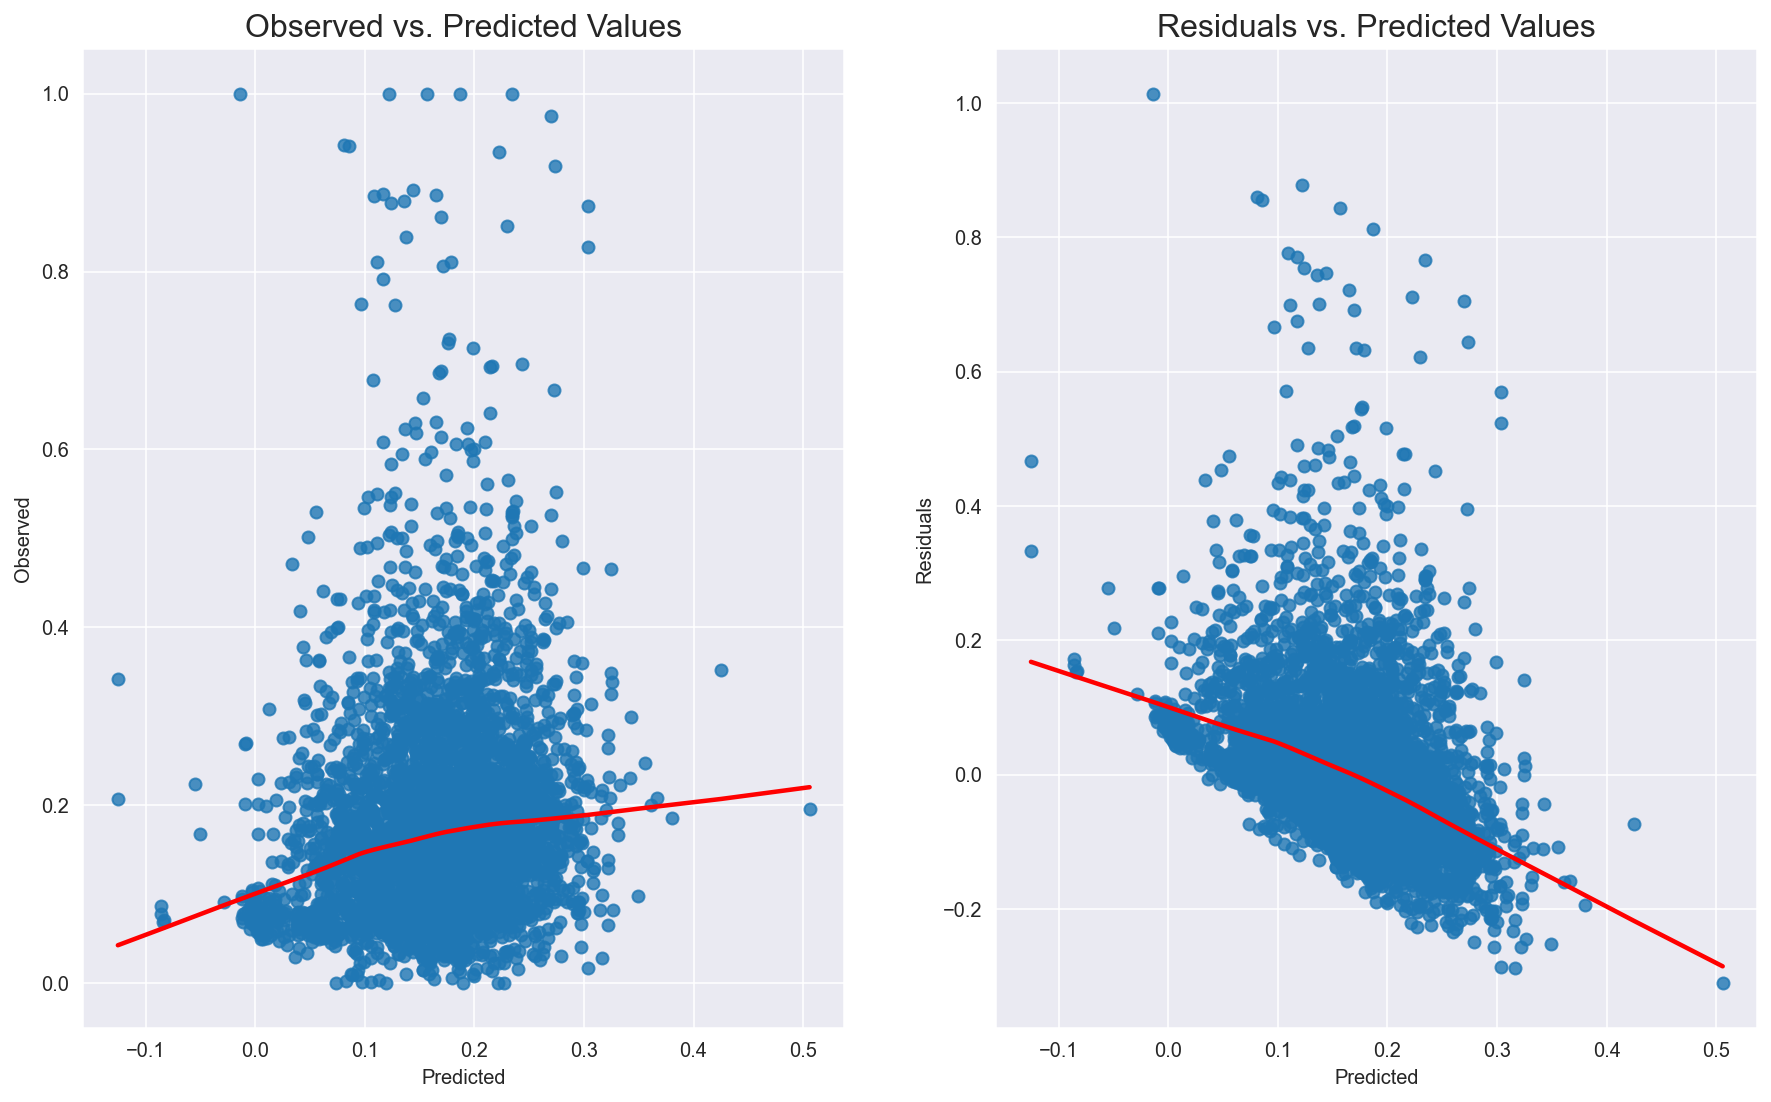

In [53]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(resulta, y=nummetro[["Norm"]])    

Text(0.5, 1.0, 'Model1 Residuals Q-Q Plot')

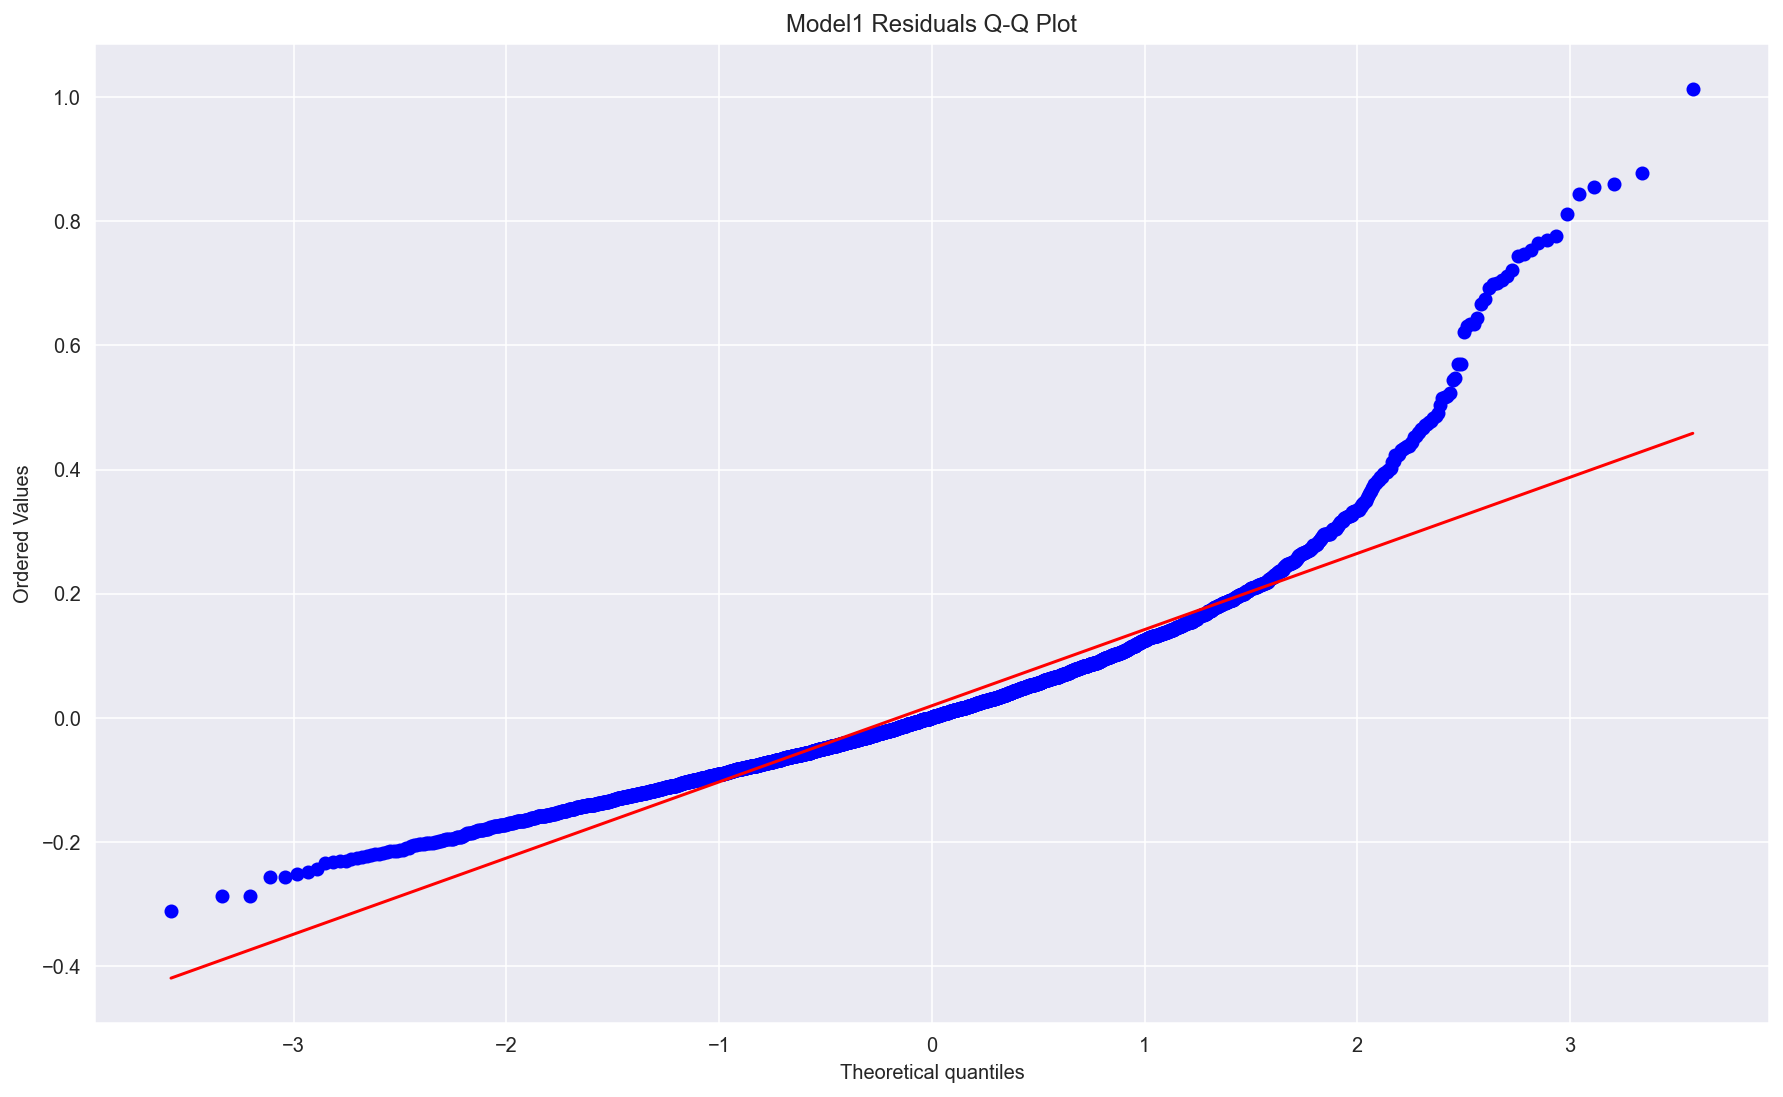

In [54]:
import statsmodels.stats.api
stats.probplot(resulta.resid, dist="norm", plot= plt)
plt.title("Model1 Residuals Q-Q Plot")

Separate Regression Tests:
 - LA, DC looks good.

In [57]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
from scipy import stats

citymetro = lametro_adj[["Norm","City"]]
citymetro = citymetro.reset_index(drop=True)
lametro_adj = lametro_adj.drop(columns = ["City","Norm"])
lametro_adj = lametro_adj.reset_index(drop=True)
lametro_adj = lametro_adj[(np.abs(stats.zscore(lametro_adj)) < 3).all(axis=1)]
lametro_adj = lametro_adj.join(citymetro)
resultla = sm.OLS(lametro_adj['Norm'], lametro_adj.drop(columns=["Norm","City"])).fit() #Initialize the GLS 
print(resultla.summary())

                                 OLS Regression Results                                
Dep. Variable:                   Norm   R-squared (uncentered):                   0.742
Model:                            OLS   Adj. R-squared (uncentered):              0.741
Method:                 Least Squares   F-statistic:                              415.7
Date:                Mon, 05 Dec 2022   Prob (F-statistic):                        0.00
Time:                        21:51:49   Log-Likelihood:                          929.99
No. Observations:                1453   AIC:                                     -1840.
Df Residuals:                    1443   BIC:                                     -1787.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [56]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
from scipy import stats

citymetro = dcmetro_adj[["Norm","City"]]
citymetro = citymetro.reset_index(drop=True)
dcmetro_adj = dcmetro_adj.drop(columns = ["City","Norm"])
dcmetro_adj = dcmetro_adj.reset_index(drop=True)
dcmetro_adj = dcmetro_adj[(np.abs(stats.zscore(dcmetro_adj)) < 3).all(axis=1)]
dcmetro_adj = dcmetro_adj.join(citymetro)
resultdc = sm.OLS(dcmetro_adj['Norm'], dcmetro_adj.drop(columns=["Norm","City"])).fit() #Initialize the GLS 
print(resultdc.summary())

                                 OLS Regression Results                                
Dep. Variable:                   Norm   R-squared (uncentered):                   0.782
Model:                            OLS   Adj. R-squared (uncentered):              0.780
Method:                 Least Squares   F-statistic:                              359.6
Date:                Mon, 05 Dec 2022   Prob (F-statistic):                   4.04e-291
Time:                        21:51:46   Log-Likelihood:                          795.77
No. Observations:                 910   AIC:                                     -1574.
Df Residuals:                     901   BIC:                                     -1530.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [58]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
from scipy import stats

citymetro = dalmetro_adj[["Norm","City"]]
citymetro = citymetro.reset_index(drop=True)
dalmetro_adj = dalmetro_adj.drop(columns = ["City","Norm"])
dalmetro_adj = dalmetro_adj.reset_index(drop=True)
dalmetro_adj = dalmetro_adj[(np.abs(stats.zscore(dalmetro_adj)) < 3).all(axis=1)]
dalmetro_adj = dalmetro_adj.join(citymetro)
resultdal = sm.OLS(dalmetro_adj['Norm'], dalmetro_adj.drop(columns=["Norm","City"])).fit() #Initialize the GLS 
print(resultdal.summary())

                                 OLS Regression Results                                
Dep. Variable:                   Norm   R-squared (uncentered):                   0.483
Model:                            OLS   Adj. R-squared (uncentered):              0.476
Method:                 Least Squares   F-statistic:                              67.79
Date:                Mon, 05 Dec 2022   Prob (F-statistic):                    4.82e-97
Time:                        21:52:37   Log-Likelihood:                          582.70
No. Observations:                 735   AIC:                                     -1145.
Df Residuals:                     725   BIC:                                     -1099.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [60]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
from scipy import stats

citymetro = chimetro_adj[["Norm","City"]]
citymetro = citymetro.reset_index(drop=True)
chimetro_adj = chimetro_adj.drop(columns = ["City","Norm"])
chimetro_adj = chimetro_adj.reset_index(drop=True)
chimetro_adj = chimetro_adj[(np.abs(stats.zscore(chimetro_adj)) < 3).all(axis=1)]
chimetro_adj = chimetro_adj.join(citymetro)
resultchi = sm.OLS(chimetro_adj['Norm'], chimetro_adj.drop(columns=["Norm","City"])).fit() #Initialize the GLS 
print(resultchi.summary())

                                 OLS Regression Results                                
Dep. Variable:                   Norm   R-squared (uncentered):                   0.502
Model:                            OLS   Adj. R-squared (uncentered):              0.495
Method:                 Least Squares   F-statistic:                              72.79
Date:                Mon, 05 Dec 2022   Prob (F-statistic):                   2.30e-102
Time:                        21:54:32   Log-Likelihood:                          254.87
No. Observations:                 732   AIC:                                     -489.7
Df Residuals:                     722   BIC:                                     -443.8
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [62]:
# UNEQUAL VARIANCE
import statsmodels.stats.api
la = statsmodels.stats.stattools.durbin_watson(resultla.resid)
dc = statsmodels.stats.stattools.durbin_watson(resultdc.resid)
dal = statsmodels.stats.stattools.durbin_watson(resultdal.resid)
chi = statsmodels.stats.stattools.durbin_watson(resultchi.resid)
print(la,dc,dal,chi)

1.623777156578896 1.809071893104196 1.6882395959614784 1.3516242785789407
